###Drive import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',1000)

In [ ]:
mobile = pd.read_csv('/content/drive/MyDrive/STUDY2/DATA ANALYSIS LAB/LABCYCLE/DATASETS/Mobile phone price_6thQuestion.csv',dtype=str)
mobile.head(3)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899


In [ ]:
mobile.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

###Cleaning

In [ ]:
mobile['Storage '] = mobile['Storage '].str.replace(' GB', '')
mobile['Storage '] = mobile['Storage '].str.replace('GB', '')
mobile['RAM '] = mobile['RAM '].str.replace(' GB','')
mobile['RAM '] = mobile['RAM '].str.replace('GB','')
mobile['Price ($)'] = mobile['Price ($)'].str.replace('$','')
mobile['Price ($)'] = mobile['Price ($)'].str.replace(',','')
mobile['Price ($)'] = mobile['Price ($)'].str.replace(' ','')
mobile['Storage '] = pd.to_numeric(mobile['Storage '], errors='coerce')
mobile['RAM '] = pd.to_numeric(mobile['RAM '], errors='coerce')
mobile['Battery Capacity (mAh)'] = pd.to_numeric(mobile['Battery Capacity (mAh)'], errors='coerce')
mobile['Price ($)'] = pd.to_numeric(mobile['Price ($)'], errors='coerce')
mobile['Screen Size (inches)'] = pd.to_numeric(mobile['Screen Size (inches)'], errors='coerce')
mobile

<ipython-input-6-b11b8d906581>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mobile['Price ($)'] = mobile['Price ($)'].str.replace('$','')


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429


In [ ]:
mobile.dtypes

Brand                      object
Model                      object
Storage                     int64
RAM                         int64
Screen Size (inches)      float64
Camera (MP)                object
Battery Capacity (mAh)      int64
Price ($)                   int64
dtype: object

###a. Identify the models & the price released by each brand.


In [ ]:
modelscount=mobile.groupby(['Brand','Model','Price ($)']).nunique().reset_index()
models = pd.pivot_table(mobile, values=['Price ($)'],
                              index=['Brand','Model'])
models
#print(modelscount[['Brand','Model','Price ($)']])

Price ($)
Brand  Model                            
Apple  iPhone 11              661.500000
       iPhone 11 Pro Max     1099.000000
       iPhone 12              799.000000
       iPhone 12 Mini         699.000000
       iPhone 12 Pro          999.000000
...                                  ...
Xiaomi Redmi Note 10S         245.666667
       Redmi Note 7           159.000000
       Redmi Note 8           179.000000
       Redmi Note 9 Pro Max   279.000000
       Redmi Note 9S          239.000000

[239 rows x 1 columns]

###b. Identify the correlation between Battery Capacity and price.

In [ ]:
correlation = mobile['Battery Capacity (mAh)'].corr(mobile['Price ($)'])
print("The correlation between Battery Capacity and Price is ",round(correlation,3))

The correlation between Battery Capacity and Price is  -0.397


###c. Find how many models are there per each Battery capacity with same price.

In [ ]:
models_per_battery_price = mobile.groupby(['Battery Capacity (mAh)', 'Price ($)'])['Model'].nunique().reset_index()
models_per_battery_price

,Battery Capacity (mAh),Price ($),Model
0,1821,399,2
1,1821,449,1
2,2227,699,1
3,2227,899,1
4,2691,699,1
...,...,...,...
174,6000,349,1
175,6000,379,1
176,6000,999,1
177,7000,429,1


###d. Count the number of models in each brand with highest storage. Draw the graph

         Brand  Storage   Model
0        Apple       512      1
1         Asus       256      1
2   Blackberry        64      3
3          CAT        32      1
4       Google       128      7
5       Huawei       512      1
6           LG       256      1
7     Motorola       256      1
8        Nokia       128      9
9      OnePlus       256      5
10        Oppo       256      8
11      Realme       128     25
12     Samsung       512      1
13        Sony       128      1
14        Vivo       256      3
15      Xiaomi       256      3


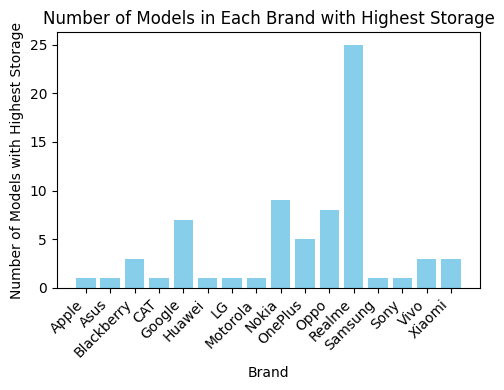

In [ ]:
max_storage_per_brand = mobile.groupby('Brand')['Storage '].max().reset_index()
merged_df = pd.merge(mobile, max_storage_per_brand, on=['Brand', 'Storage '])
models_count_per_brand = merged_df.groupby(['Brand','Storage '])['Model'].count().reset_index()
print(models_count_per_brand)

plt.figure(figsize=(5, 4))
plt.bar(models_count_per_brand['Brand'], models_count_per_brand['Model'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Number of Models with Highest Storage')
plt.title('Number of Models in Each Brand with Highest Storage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###e. Identify how many models are released by each brand.

In [ ]:
models_released_by_each_brand = mobile.groupby('Brand')['Model'].nunique().reset_index()
models_released_by_each_brand

,Brand,Model
0,Apple,15
1,Asus,3
2,Blackberry,3
3,CAT,1
4,Google,4
5,Huawei,10
6,LG,3
7,Motorola,19
8,Nokia,17
9,OnePlus,10


###f. Find the RAM capacity of all models of every brand.


In [ ]:
ram_capacity = pd.pivot_table(mobile, values=['RAM '],
                              index=['Brand','Model'])
ram_capacity

RAM 
Brand  Model                     
Apple  iPhone 11              4.0
       iPhone 11 Pro Max      4.0
       iPhone 12              4.0
       iPhone 12 Mini         4.0
       iPhone 12 Pro          6.0
...                           ...
Xiaomi Redmi Note 10S         6.0
       Redmi Note 7           4.0
       Redmi Note 8           4.0
       Redmi Note 9 Pro Max   6.0
       Redmi Note 9S          6.0

[239 rows x 1 columns]

###g. same as b

###h. Find how many models are there per each Battery capacity.


In [ ]:
models_battery = mobile.groupby('Battery Capacity (mAh)')['Model'].nunique().reset_index()
models_battery.head(6)

,Battery Capacity (mAh),Model
0,1821,2
1,2227,2
2,2691,1
3,2800,1
4,2815,3
5,2942,1


###i. Calculate average price of each brand.

In [ ]:
avg_price_brand = mobile.groupby('Brand')['Price ($)'].mean().reset_index()
avg_price_brand

,Brand,Price ($)
0,Apple,745.666667
1,Asus,874.000000
2,Blackberry,499.000000
3,CAT,299.000000
4,Google,699.000000
5,Huawei,783.166667
6,LG,615.666667
7,Motorola,278.130435
8,Nokia,244.714286
9,OnePlus,644.333333


###j. Find which mobile brand has highest price.

In [ ]:
highest_price = mobile[['Brand','Price ($)']].max()
highest_price

Brand        Xiaomi
Price ($)      1999
dtype: object

###k. Identify any missing values are there in mobile phone price dataset.


In [ ]:
m=mobile[mobile.isnull().any(axis=1)]
m

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
88,LG,Wing,256,8,NaN,64MP + 13MP + 12MP,4000,999
373,Samsung,Galaxy Z Fold2 5G,256,12,NaN,12+12+12,4500,1999


###l. Display all models associated with apple brand.


In [ ]:
apple_brand = mobile[mobile['Brand'] == 'Apple'][['Model']]
apple_brand

,Model
0,iPhone 13 Pro
5,iPhone 13
13,iPhone 12 Mini
25,iPhone 11
32,iPhone SE (2nd Gen)
39,iPhone XR
45,iPhone 12 Mini
51,iPhone 11 Pro Max
57,iPhone 13 Pro Max
62,iPhone SE (2020)


###m. Find the mobile prices based on Camera (MP).


In [ ]:
#mobile['Camera (sum)'] = mobile['Camera (MP)'].str.extractall('(\d+)').astype(float).groupby(level=0).sum()
camera_price_sum = mobile.groupby('Camera (MP)', as_index=False)['Price ($)'].mean()
camera_price_sum['Price ($)'] = camera_price_sum['Price ($)'].round(2)
camera_price_sum

,Camera (MP),Price ($)
0,108 + 10 + 10 + 12,1199.00
1,108 + 8 + 5 + 2,279.00
2,108+10+10+12,1199.00
3,108+12+12,1299.00
4,108+13+5,649.00
...,...,...
138,64MP + 8MP + 5MP,325.67
139,64MP + 8MP + 5MP + 2MP,296.50
140,64MP + 8MP + 5MP + 5MP,274.00
141,8MP,99.00


###n. List the models along with brands which have highest storage.


In [ ]:
brands_with_highstorage = mobile.groupby('Brand')['Model','Storage '].max()
brands_with_highstorage

<ipython-input-133-b4bf9ff77405>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brands_with_highstorage = mobile.groupby('Brand')['Model','Storage '].max()


,Model,Storage
Brand,,
Apple,iPhone XS Max,512
Asus,Zenfone 8 Flip,256
Blackberry,KEY2 LE,64
CAT,S42,32
Google,Pixel 6,128
Huawei,Y7p,512
LG,Wing,256
Motorola,Moto G9 Power Lite,256
Nokia,XR20,128


###o. How many models in each brand having RAM>6.

In [ ]:
ram_6 = mobile[mobile['RAM ']>6]
models_count_per_brand = ram_6.groupby('Brand')['Model'].count().reset_index()
models_count_per_brand

,Brand,Model
0,Asus,3
1,Google,5
2,Huawei,10
3,LG,1
4,Motorola,1
5,Nokia,2
6,OnePlus,12
7,Oppo,25
8,Realme,11
9,Samsung,19


###p. List the models having price >600 and Storage between 100 and 200.

In [ ]:
price_storage = mobile[(mobile['Price ($)']>600) & (mobile['Storage '].between(100,200))]
price_storage[['Model','Storage ','Price ($)']]

,Model,Storage,Price ($)
0,iPhone 13 Pro,128,999
2,9 Pro,128,899
4,Pixel 6,128,799
5,iPhone 13,128,799
8,Reno6 Pro+ 5G,128,699
16,Galaxy S21,128,799
23,9,128,729
60,Reno6 Pro 5G,128,659
77,iPhone 13,128,799
78,Galaxy S21,128,799
